# Default of Credit Card Clients

# Decision tree type analysis

In [1]:
from joblib import Memory #cache purpose
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
pwd = "./default/"
cache_dir = pwd + 'cache_dir'
mem = Memory(cache_dir)
output_path = './output/grd_search/'
try:
    _=os.listdir(output_path)
except:
    os.mkdir(output_path)
from data_loader_default import load_data_default


load_data = load_data_default(random_state=433)
X_train ,y_train, X_val, y_val = load_data.load_splitted_data()
def to_csv(arr,name):
    df = pd.DataFrame(arr)
    df.to_csv(f'{output_path}/{name}.csv')

In [2]:
df,label = load_data.load_train_data()

In [3]:
from pyts.transformation import BagOfPatterns as BOP
from mods_defaults import ElementaryExtractor,BasicTransformer,MyMulPyts, NonTsPass,Passer #for pickle (cache)purpose

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# pipeline
from sklearn.pipeline import make_union
# evaluation modules
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV
def my_score(y_train,y_pred):
    accuracy = accuracy_score(y_train,y_pred)
    print(f'accuracy : {accuracy}')
    pre_score = precision_score(y_train,y_pred)
    print(f'precision : {pre_score}')
    rec_score = recall_score(y_train,y_pred)
    print(f'recall : {rec_score}')
    f_score = f1_score(y_train,y_pred)
    print(f'f1_score: {f_score}')

    return [round(accuracy,4), round(pre_score,4), round(rec_score ,4), round(f_score,4)]

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=None):
    if ax is None:
        plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        plt.plot(thresholds, recalls[:-1], 'g-',label="recall")
        plt.xlabel("thresholds")
        plt.legend(loc="upper left")
        plt.ylim([0,1])
    else:
        ax.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        ax.plot(thresholds, recalls[:-1], 'g-',label="recall")
        ax.set_xlabel("thresholds")
        ax.legend(loc="upper left")
        ax.set_ylim([0,1])

In [5]:
def my_function(pred_train,pred_val,score_val,name):
    cf_matrix_t = confusion_matrix(y_train,pred_train)
    cf_matrix_v = confusion_matrix(y_val,pred_val)
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,pred_train)
    print('\n'+'Val scores')
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,score_val,ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,score_val,ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, score_val)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{name}')
    plt.show()
    plt.close()    

In [6]:
my_base_transform = BasicTransformer('')
clf =AdaBoostClassifier(random_state=42)
columns = [column for column in my_base_transform.raw_columns if column != 'SEX' and column != 'EDUCATION' and column !='MARRIAGE']
extractors = [NonTsPass(),Passer(columns)]
extractor = make_union(*extractors)
pipe = Pipeline([('transfrom',my_base_transform),
                 ('ext',extractor),
                  ('clf',clf)])

In [7]:
pipe.get_params()

{'memory': None,
 'steps': [('transfrom', BasicTransformer(scale='')),
  ('ext',
   FeatureUnion(transformer_list=[('nontspass', NonTsPass()),
                                  ('passer',
                                   Passer(columns=['LIMIT_BAL', 'AGE', 'PAY_1',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6', 'BILL_AMT_1',
                                                   'BILL_AMT_2', 'BILL_AMT_3',
                                                   'BILL_AMT_4', 'BILL_AMT_5',
                                                   'BILL_AMT_6', 'PAY_AMT_1',
                                                   'PAY_AMT_2', 'PAY_AMT_3',
                                                   'PAY_AMT_4', 'PAY_AMT_5',
                                                   'PAY_AMT_6', 'USAGE_1',
                                                   'USAGE_2', 'USAGE_3', 'USAGE_4',
                      

/home/klosterle97/miniconda3/envs/vir_py_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/klosterle97/miniconda3/envs/vir_py_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/klosterle97/miniconda3/envs/vir_py_10/lib/python3.10/site-packages/sklearn/pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/klosterle97/miniconda3/envs/vir_py_10/lib/python3.10/site

[[4183  198]
 [ 794  450]]

train scores
accuracy : 0.8253037037037037
precision : 0.7013853258081068
recall : 0.3661934101259041
f1_score: 0.48116860260471667

Val scores


ValueError: y should be a 1d array, got an array of shape (5625, 2) instead.

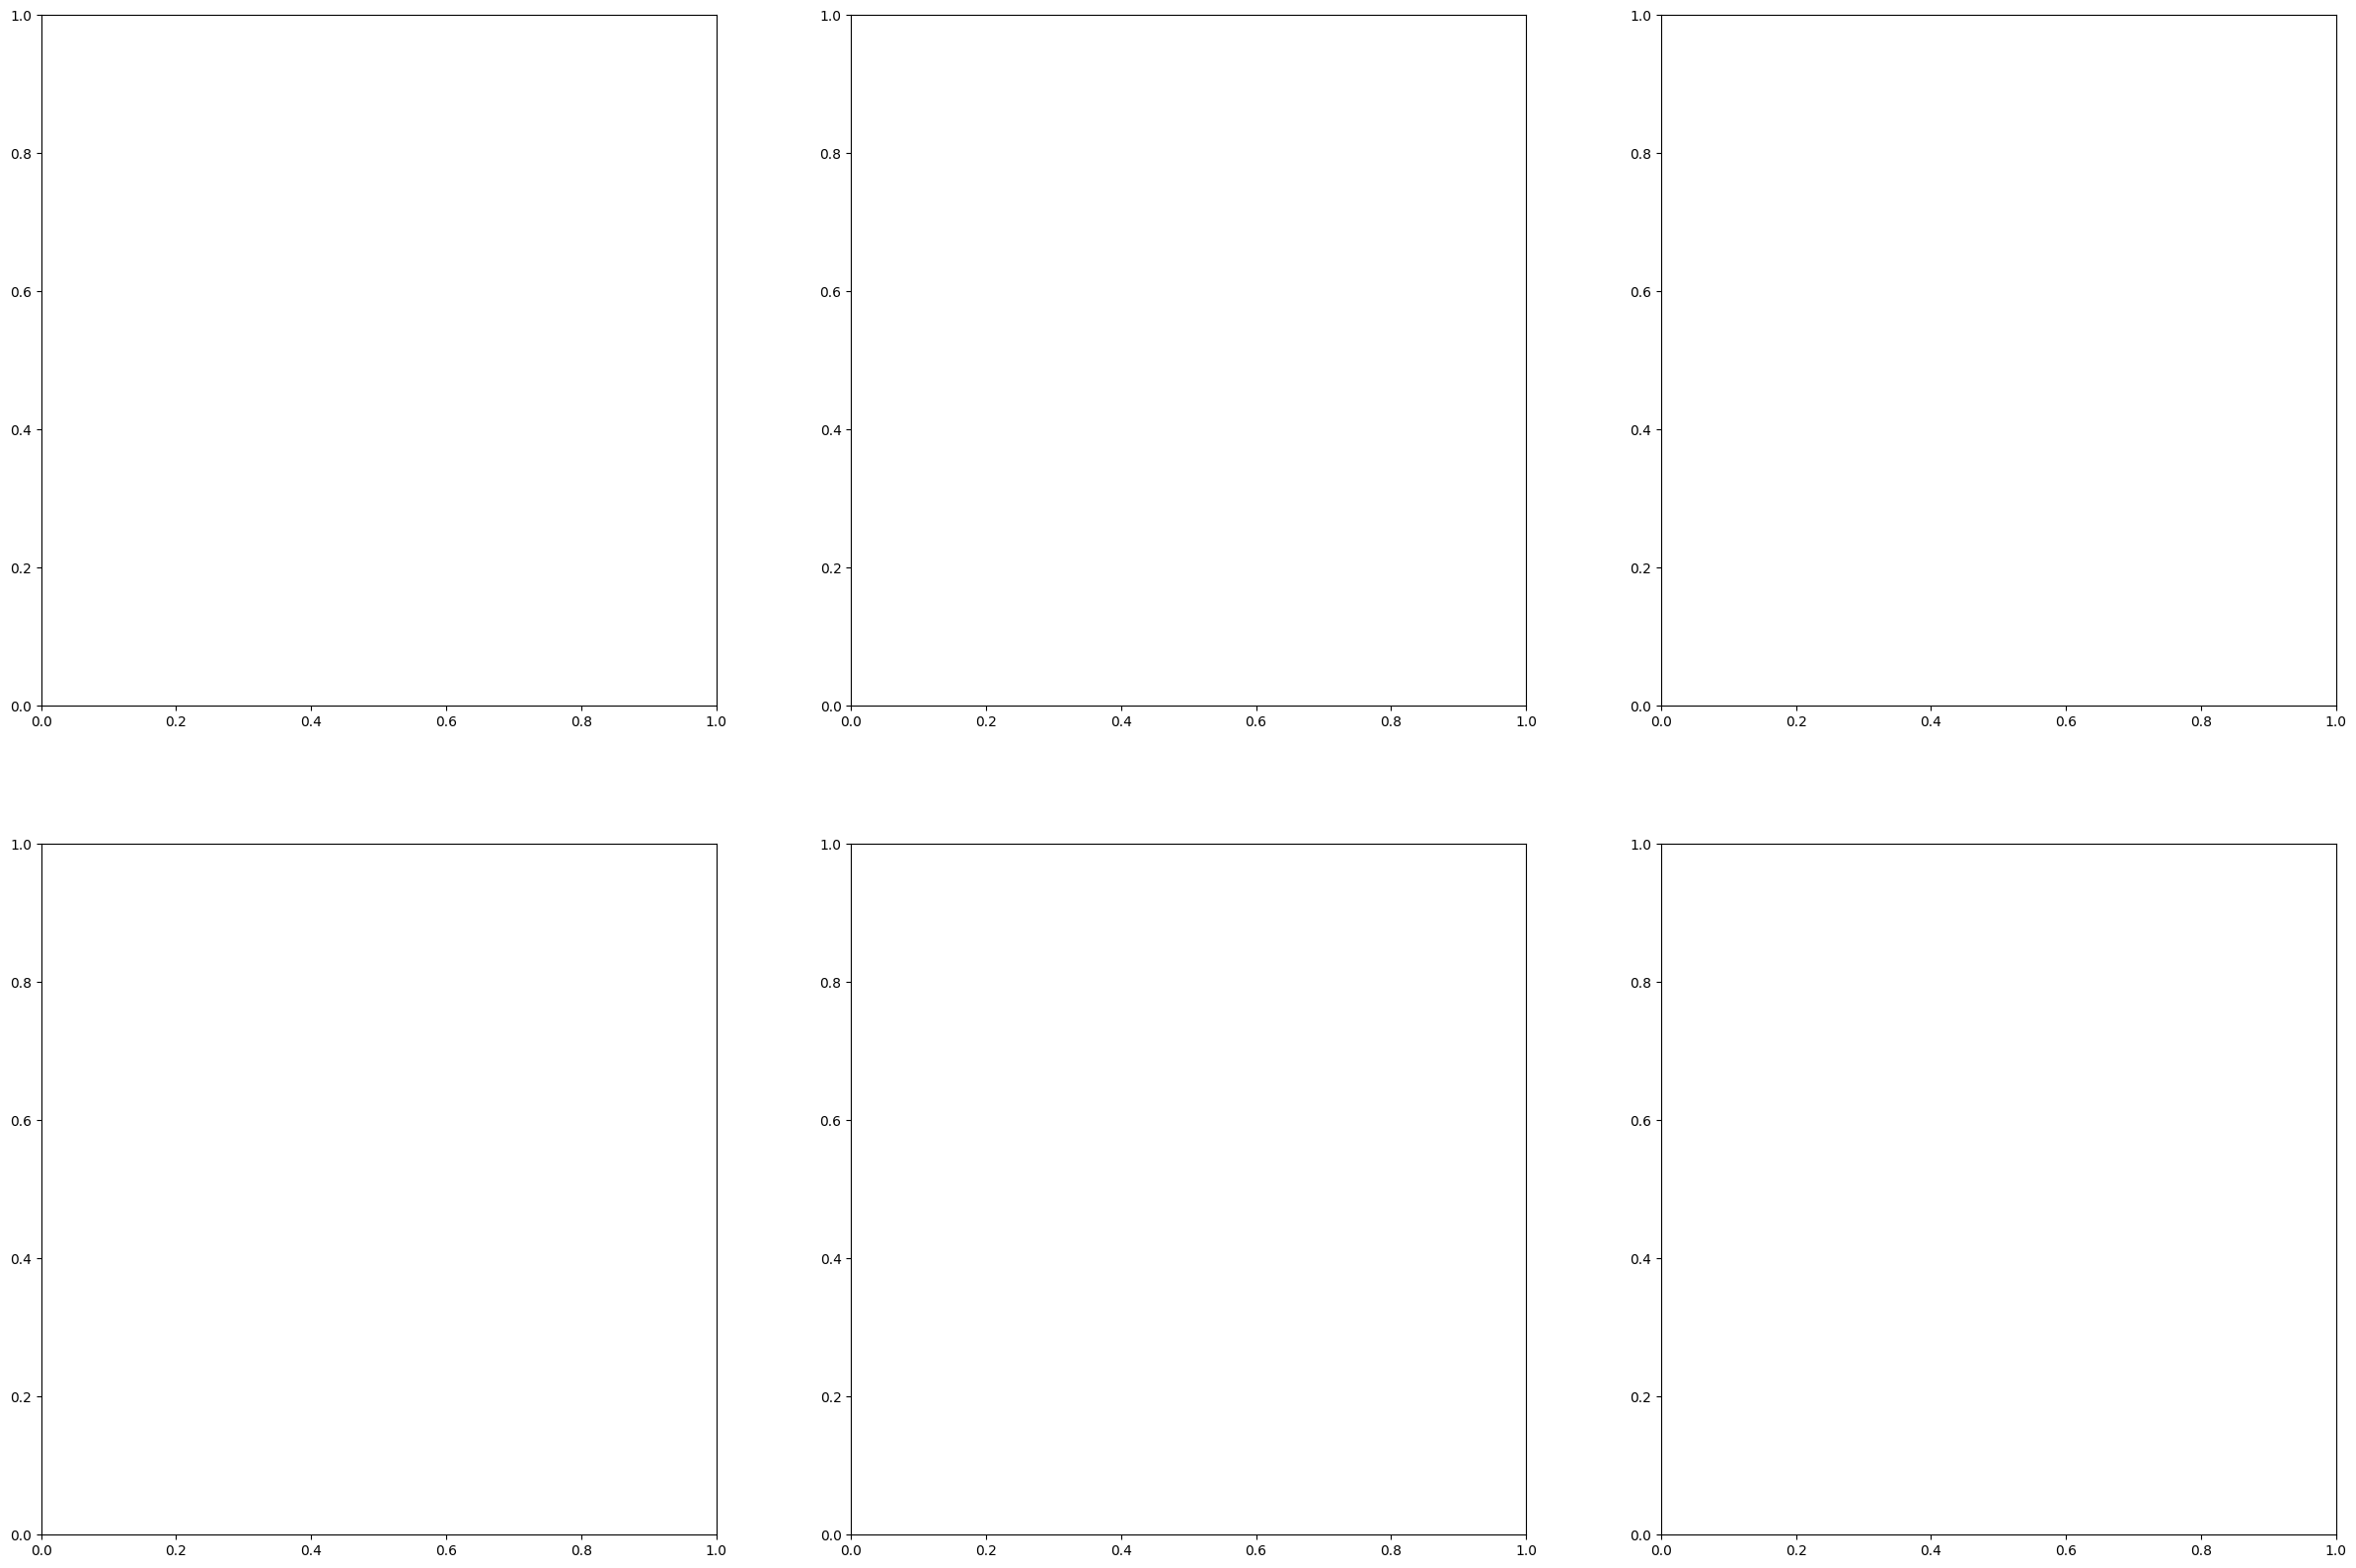

In [8]:
param_grid = {
    'clf' : [
            #  DecisionTreeClassifier(),
            #  RandomForestClassifier(),
            #  AdaBoostClassifier(),
              GradientBoostingClassifier()],
    'clf__random_state':[42,34,44,444,555],
    'clf__learning_rate' : [1,0.5,0.01,0.001],
    'clf__n_estimators' : [300],
    'clf__min_samples_split':[2,0.01,0.1,0.4],
    'clf__min_samples_leaf': [1,0.01,0.005,0.1,0.4],
    'clf__max_depth':[1,2,3,6,10,None],
    'clf__max_features' : [1.0,'sqrt','None'],
}
search = GridSearchCV(pipe, 
                      param_grid=param_grid,
                      scoring='accuracy',
                      n_jobs=-1)
search.fit(df,label)
pd.DataFrame(search.cv_results_).to_csv(output_path+'grd_cv_results.csv')
pipe_new = search.best_estimator_
pipe_new.fit(X_train,y_train)
pred_train = pipe_new.predict(X_train)
pred_val = pipe_new.predict(X_val)


score_val = pipe_new.predict_proba(X_val)[:,1]
to_csv(pred_train,'pred_train')
to_csv(pred_val,'pred_val')
to_csv(score_val,'score_val')

my_function(pred_train,pred_val,score_val,'GradientBoost')